In [ ]:
# yfinance
# Liquidity analysis and Moving Average

# Company Sector (sector)
# P/E Ratio (trailingPE) - The trailing P/E ratio is calculated by dividing a company's current share price by its earnings per share (EPS) over the past 12 months.
# Company Beta - Beta measures the level of correlation between a stock and the S&P 500 stock index. It is sometimes considered a measure of risk. Higher the Beta, less stable.

# Zalando SE: ZAL.DE, Liquidity Measures
# P/E Ratio: 25
# Company Beta: 1.849
# working_capital = current_assets - current_liabilities = 2.665300e+09
# current_ratio = current_assets / current_liabilities = 1.501128e+00
# quick_ratio = (current_assets - inventory) / current_liabilities = 1.209754e+00
# cash_ratio = (cash_and_equivalents + receivables) / current_liabilities = 5.982213e-01

# Hexagon AB: HEXA-B.ST, Liquidity Measures
# P/E Ratio: 40.857662
# Company Beta: 0.902
# working_capital = current_assets - current_liabilities = 1.119610e+10
# current_ratio = current_assets / current_liabilities = 2.682511e+00
# quick_ratio = (current_assets - inventory) / current_liabilities = 2.592435e+00
# cash_ratio = (cash_and_equivalents + receivables) / current_liabilities = 2.773052e-01

# Stadler Rail AG: SRAIL.SW, Liquidity Measures
# P/E Ratio: 63.677418
# Company Beta: 0.593
# working_capital = current_assets - current_liabilities = 7.740790e+08
# current_ratio = current_assets / current_liabilities = 1.152337e+00
# quick_ratio = (current_assets - inventory) / current_liabilities = 8.255007e-01
# cash_ratio = (cash_and_equivalents + receivables) / current_liabilities = 3.296593e-01




In [1]:
import yfinance as yf
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mpdates

In [46]:
# Fetch balance sheet data for a company (e.g.Adidas AG: ADS.DE, HUGO BOSS AG: BOSS.DE, Zalando SE: ZAL.DE,Hexagon AB: HEXA-B.ST,Stadler Rail AG: SRAIL.SW,...)
ticker = "SRAIL.SW"
company = yf.Ticker(ticker)
company_info = company.info
balance_sheet = company.balance_sheet

In [47]:
print("Company Sector:", company.info['sector'])
# Zalando thus traded at about 25 times trailing earnings. It makes sense only if we compare it to anothe company or to global index. P/E ratio at Hexagon is 40. Zalando is less risky.
print("P/E Ratio:", company.info['trailingPE'])
# Higher the beta, riskier and less stable the business is.
print("Company Beta:", company.info['beta'])

Company Sector: Industrials
P/E Ratio: 63.677418
Company Beta: 0.593


In [ ]:
data = company.history(period="max")
print(data.to_string())

In [49]:
print(balance_sheet)

                                                    2024-12-31    2023-12-31  \
Treasury Shares Number                            1.114000e+03  2.520000e+02   
Ordinary Shares Number                            9.999889e+07  9.999975e+07   
Share Issued                                      1.000000e+08  1.000000e+08   
Net Debt                                                   NaN           NaN   
Total Debt                                        8.928290e+08  6.881010e+08   
...                                                        ...           ...   
Accounts Receivable                               4.142690e+08  3.340710e+08   
Allowance For Doubtful Accounts Receivable       -3.628000e+06 -3.469000e+06   
Gross Accounts Receivable                         4.178970e+08  3.375400e+08   
Cash Cash Equivalents And Short Term Investments  1.260853e+09  1.087044e+09   
Cash And Cash Equivalents                         1.260853e+09  1.087044e+09   

                                       

In [50]:
# The balance sheet data is typically by date, with the most recent year first
latest_balance_sheet = balance_sheet.iloc[:, 0]

In [51]:
# Extract the necessary values from the balance sheet
current_assets = latest_balance_sheet.loc["Total Assets"]
current_liabilities = latest_balance_sheet.loc["Total Liabilities Net Minority Interest"]
cash_and_equivalents = latest_balance_sheet.loc["Cash And Cash Equivalents"]
receivables = latest_balance_sheet.loc["Accounts Receivable"]
inventory = latest_balance_sheet.loc["Inventory"]

In [52]:
# Calculate the liquidity ratios
working_capital = current_assets - current_liabilities
current_ratio = current_assets / current_liabilities
quick_ratio = (current_assets - inventory) / current_liabilities
cash_ratio = (cash_and_equivalents + receivables) / current_liabilities

In [53]:
# Display the results
liquidity_metrics = pd.Series({
    "Working Capital": working_capital,
    "Current Ratio": current_ratio,
    "Quick Ratio": quick_ratio,
    "Cash Ratio": cash_ratio
})

print(f"Liquidity Analysis for {ticker}:")
print(liquidity_metrics)

Liquidity Analysis for SRAIL.SW:
Working Capital    7.740790e+08
Current Ratio      1.152337e+00
Quick Ratio        8.255007e-01
Cash Ratio         3.296593e-01
dtype: float64


In [ ]:
start_date = datetime.datetime(2025, 9, 1)
end_date = datetime.datetime(2025, 10, 31)
data = company.history(start=start_date, end=end_date)
print(data.to_string())

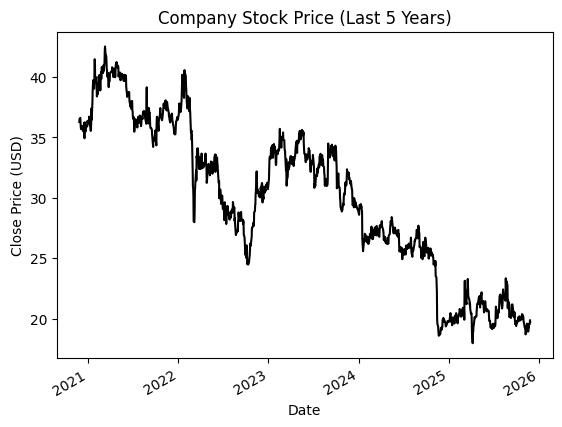

In [31]:
data = company.history(period="5y")
# print(data.to_string())
data['Close'].plot(title="Company Stock Price (Last 5 Years)", color="k")
plt.xlabel("Date")
plt.ylabel("Close Price (USD)")
plt.show()

In [32]:
# create csv file from yahoo data
# Download historical data for your selected ticker
company_data = yf.download(ticker, period="max")

# Save the data to a CSV file
company_data.to_csv("company.csv")
print("company.csv has been created.")

/tmp/ipython-input-2210947999.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  company_data = yf.download(ticker, period="max")
[*********************100%***********************]  1 of 1 completed

company.csv has been created.


In [33]:
# delete first 2 lines in company file
company = pd.read_csv('/content/company.csv', parse_dates = True)
company = company.rename(columns={'Price': 'Date'})
company.drop(index=company.index[0], axis=0, inplace=True)
company.drop(index=company.index[0], axis=0, inplace=True)
company.head()

,Date,Close,High,Low,Open,Volume
2,2019-04-11,52.11733627319336,52.11733627319336,52.11733627319336,52.11733627319336,0
3,2019-04-12,37.437618255615234,37.437618255615234,35.570082376002745,36.48213509056056,13113556
4,2019-04-15,36.74272155761719,37.611343832329325,36.74272155761719,37.524482930270516,1894819
5,2019-04-16,35.78723907470703,37.003308294763166,35.78723907470703,36.916447391020256,1341388
6,2019-04-17,36.30841064453125,36.59071354826263,35.617857522364574,35.77855052351904,726814


In [34]:
company=company.set_index('Date')

In [35]:
company.head()

,Close,High,Low,Open,Volume
Date,,,,,
2019-04-11,52.11733627319336,52.11733627319336,52.11733627319336,52.11733627319336,0
2019-04-12,37.437618255615234,37.437618255615234,35.570082376002745,36.48213509056056,13113556
2019-04-15,36.74272155761719,37.611343832329325,36.74272155761719,37.524482930270516,1894819
2019-04-16,35.78723907470703,37.003308294763166,35.78723907470703,36.916447391020256,1341388
2019-04-17,36.30841064453125,36.59071354826263,35.617857522364574,35.77855052351904,726814


In [36]:
# SIMPLE MOVING AVERAGE - 30 days
# Extract 'Close' column and convert to DataFrame
company = company['Close'].to_frame()
company['Close'] = pd.to_numeric(company['Close'], downcast='float')

# Calculate 30-day Simple Moving Average (SMA)
company['SMA30'] = company['Close'].rolling(30).mean()

# Remove NULL values
company.dropna(inplace=True)
print(company)

                Close      SMA30
Date                            
2019-05-27  38.983768  37.773923
2019-05-28  38.879536  37.332663
2019-05-29  38.479965  37.367408
2019-05-31  38.080402  37.411997
2019-06-03  38.618950  37.506387
...               ...        ...
2025-11-20  19.270000  19.672667
2025-11-21  19.570000  19.665333
2025-11-24  19.540001  19.643333
2025-11-25  19.879999  19.634667
2025-11-26  19.740000  19.627000

[1639 rows x 2 columns]


<Axes: xlabel='Date'>

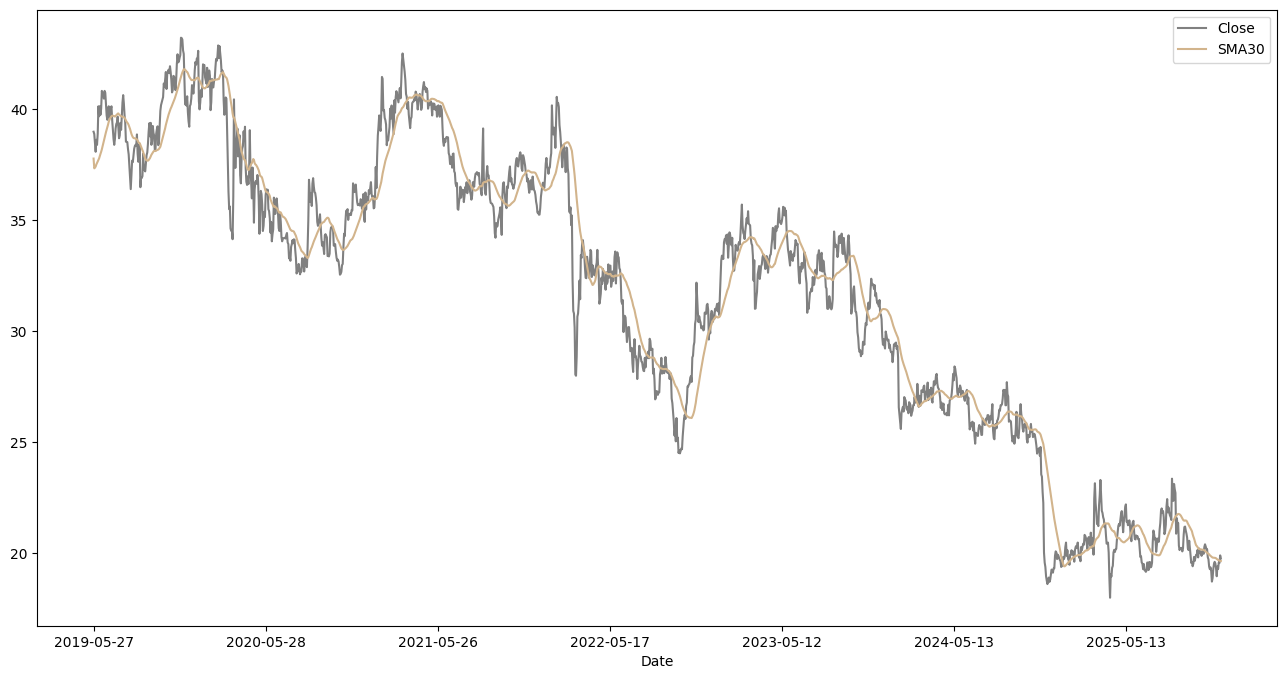

In [37]:
# plotting Close price and simple
# moving average of 30 days using .plot() method
company[['Close', 'SMA30']].plot(label='COMPANY',figsize=(16, 8), color=['grey', 'tan'])

In [38]:
# EXPONENTIAL MOVING AVERAGE - 30 days
# Extract and isolate 'Close' column, converting to DataFrame
company = company['Close'].to_frame()
company['Close'] = pd.to_numeric(company['Close'], downcast='float')

# Calculate Exponential Moving Average (EWMA) with a span of 30
company['EWMA30'] = company['Close'].ewm(span=30).mean()

# Print DataFrame
company

,Close,EWMA30
Date,,
2019-05-27,38.983768,38.983768
2019-05-28,38.879536,38.929915
2019-05-29,38.479965,38.769825
2019-05-31,38.080402,38.579864
2019-06-03,38.618950,38.588757
...,...,...
2025-11-20,19.270000,19.598499
2025-11-21,19.570000,19.596660
2025-11-24,19.540001,19.593005


<Axes: xlabel='Date'>

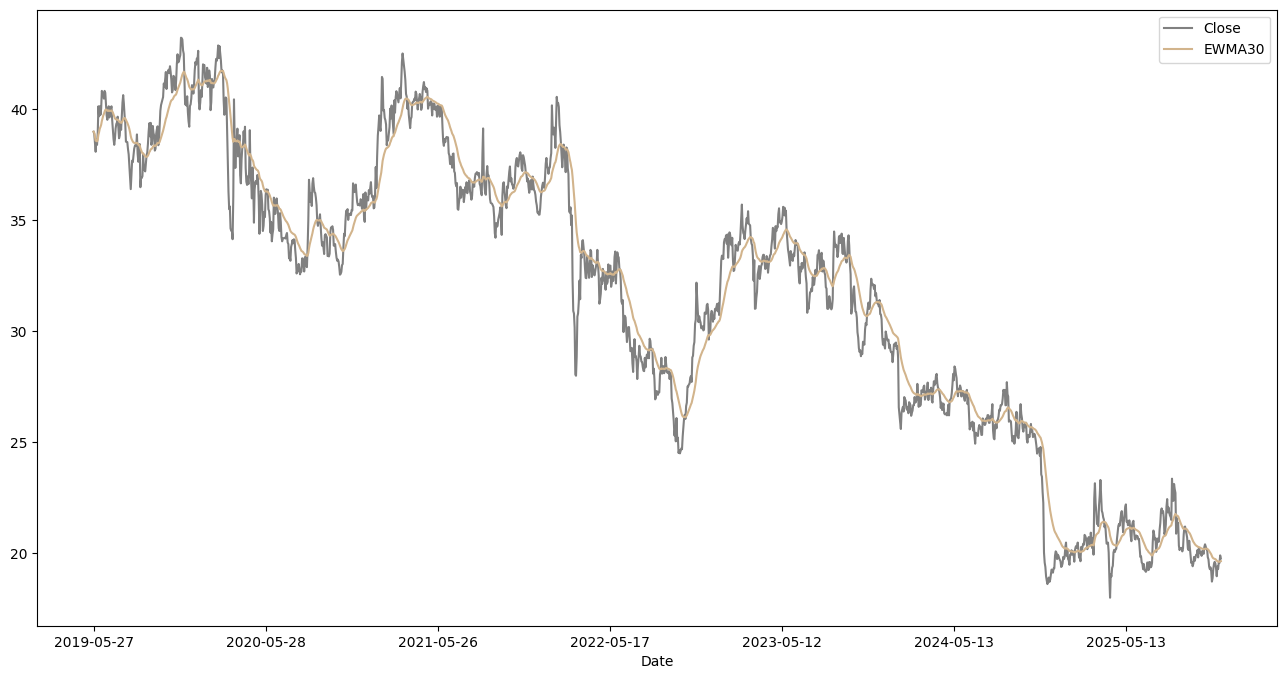

In [39]:
# plotting Close price and exponential
# moving averages of 30 days
# using .plot() method
company[['Close', 'EWMA30']].plot(label='COMPANY',figsize=(16, 8), color=['grey', 'tan'])

In [40]:
# CUMULATIVE MOVING AVERAGE - 30 days
# Extract and isolate 'Close' column, converting to DataFrame
company = company['Close'].to_frame()
company['Close'] = pd.to_numeric(company['Close'], downcast='float')

# Calculate Cumulative Moving Average (CMA) with a window of 30
company['CMA30'] = company['Close'].expanding().mean()

# Print DataFrame
company

,Close,CMA30
Date,,
2019-05-27,38.983768,38.983768
2019-05-28,38.879536,38.931652
2019-05-29,38.479965,38.781090
2019-05-31,38.080402,38.605918
2019-06-03,38.618950,38.608524
...,...,...
2025-11-20,19.270000,31.721474
2025-11-21,19.570000,31.714046
2025-11-24,19.540001,31.706610


<Axes: xlabel='Date'>

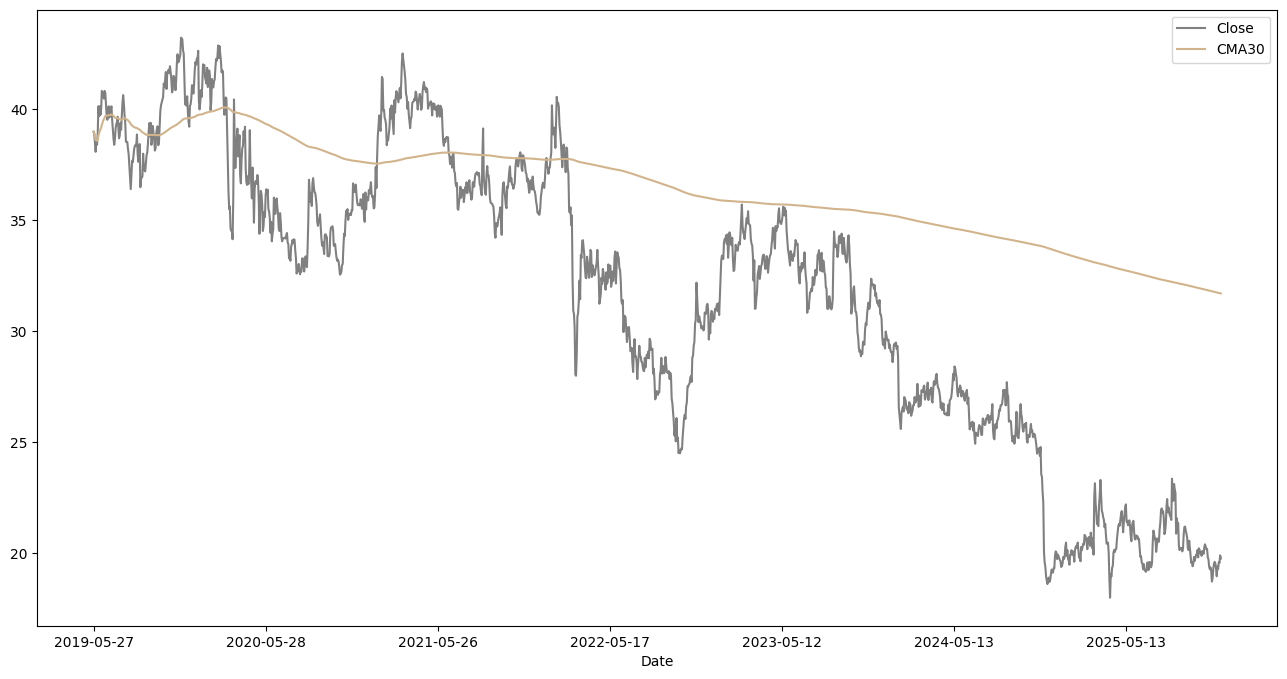

In [41]:
# plotting Close price and cumulative moving
# average of 30 days using .plot() method
company[['Close', 'CMA30']].plot(label='COMPANY',figsize=(16, 8), color=['grey', 'tan'])

In [ ]:
# https://stackoverflow.com/questions/70090315/balance-sheet-from-using-yfinance-does-not-have-total-debt-like-on-yahoo-finan
# https://www.google.com/search?q=python+liquidity&rlz=1CAHUTT_enAT1105&oq=python+liquidity&gs_lcrp=EgZjaHJvbWUyBggAEEUYOTILCAEQABgNGBMYgAQyCwgCEAAYDRgTGIAEMgoIAxAAGA0YExgeMgwIBBAAGAoYDRgTGB4yCggFEAAYDRgTGB4yCggGEAAYDRgTGB4yCggHEAAYDRgTGB4yCggIEAAYDRgTGB4yCggJEAAYDRgTGB7SAQk3MzIxajBqMTWoAgywAgHxBa7A-IX_N5pz&sourceid=chrome&ie=UTF-8
# https://www.excelpricefeed.com/userguide/excel-formula-yahoo-finance/stocks-financials-balance-sheet
# https://ranaroussi.github.io/yfinance/
# https://www.kaggle.com/code/rizwanrizwannazir/python-for-finance-with-yfinance-stock-market
# https://www.geeksforgeeks.org/pandas/how-to-calculate-moving-average-in-a-pandas-dataframe/
# https://de.finance.yahoo.com/quote/HEXA-B.ST/

